#SQL

> Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

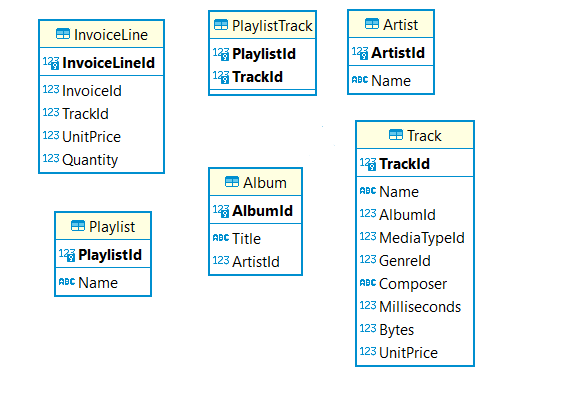

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

**Réponse :**

+ Table Artist - 1 to many - Table Album. Clé primaire : Artist.ArtistId Clé étrangère : Album.ArtistId => un artiste peut avoir plusieurs albums mais un album ne peut avoir qu'un seul artiste
+ Table Album - 1 to many - Table Track. Clé primaire : Album.AlbumId Clé étrangère Track.albumId => un album peut avoir plusieurs morceaux mais un morceau ne peut avoir qu'un seul album
+ Relation many to many entre les tables Playlist et Track via la table PlaylistTrack => une playlist peut avoir plusieurs morceaux et un morceau peut être dans plusieurs playlist
  + Clé primaire : Playlist.PlaylistId Clé étrangère : PlaylistTrack.PlaylistId
  + Clé primaire : Track.TrackId Clé étrangère : PlaylistTrack.TrackId
+ Table track - 1 to many - table InvoiceLine. Clé primaire : Track.TrackId CLé étrangère : InvoiceLine.TrackId => une ligne de facture correspond à un morceau, mais un morceau peut exister dans plusieurs lignes de facture

----------------------------------------------------------------------------------------------------------------------------------------------------------------

> Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



**Réponse:**

Il y a une table intermédiaire qui est la table PlaylistTrack

Il est recommandé de créer une table intermédiaire lorsqu'il existe une relation many to many.

La création de la table intermédiaire avec les clés étrangères des deux tables permet de simplifier le schéma en instaurant des relations one to many entre les deux tables et la table intermédiaire

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

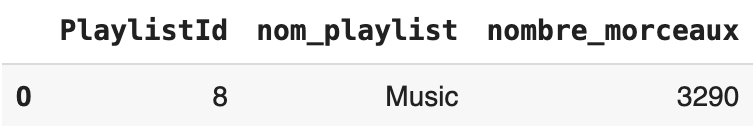

In [ ]:
pd.read_sql("""select Playlist.PlaylistId, Playlist.name as nom_playlist, count(distinct Track.TrackId) as nombre_morceaux
              from Playlist
              join PlaylistTrack on PlaylistTrack.PlaylistId = Playlist.PlaylistId
              join Track on Track.TrackId = PlaylistTrack.TrackId
              group by Playlist.PlaylistId
              order by nombre_morceaux desc
              limit 1""", conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,8,Music,3290


> Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 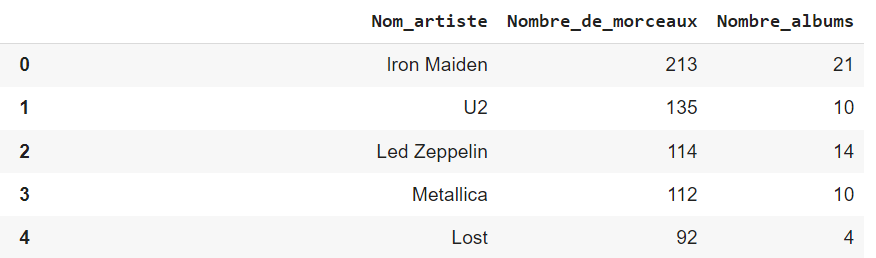

In [ ]:
pd.read_sql("""select Artist.name as Nom_artiste, count(Track.TrackId) as Nombre_de_morceaux, count(distinct Album.AlbumId) as Nombre_albums
              from Artist
              join Album on Album.ArtistId = Artist.ArtistId
              join Track on Track.AlbumId = Album.AlbumId
              group by Artist.Name
              order by Nombre_de_morceaux desc
              limit 5""", conn)

,Nom_artiste,Nombre_de_morceaux,Nombre_albums
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4


> Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

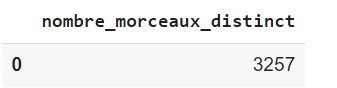

In [ ]:
pd.read_sql("""select count(distinct Track.Name) as nombre_morceaux_distinct from Track""", conn)

,nombre_morceaux_distinct
0,3257


> La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

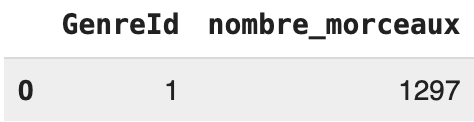

In [ ]:
pd.read_sql("""select GenreId, count(distinct TrackId) as nombre_morceaux from Track
                group by GenreId
                limit 1""", conn)

,GenreId,nombre_morceaux
0,1,1297


---

#RGPD  



> Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

RGPD signifie "Réglement Général sur la Protection des Données"

C'est une réglementation à l'échelle européenne qui encadre la collecte, le stockage et l'utilisation des données personnelles
Elle définit notamment le contexte dans lequel ces données peuvent être collectées, stockées, utilisées

Par exemple, une entreprise qui fait de la publicité ciblée ne collectera / n'utilisera pas les données comme le ferait une administration
Et des données de type médical par exemple ne peuvent être utilisées que dans un cadre très strict

Son représentant en France est la CNIL, le CEPD à l'échelle européenne

---

#Web Scraping



> Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

Lorsque l'on fait du web scrapping, la première étape consiste à vérifier la possibilité de scrapper un site via une requête

La réponse [200] indique que l'url indiquée est accessible et donc qu'on pourra explorer et récupérer le contenu du site

En revanche la réponse [404] indique que l'url à laquelle on souhaite accéder n'est pas accessible. On ne pourra donc pas en récupérer le contenu

---


#API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

> Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".

In [ ]:
url = f"https://api-adresse.data.gouv.fr/reverse/?lon={longitude_appartement}&lat={latitude_appartement}"

In [ ]:
import requests

# la méthode .get(url) interroge le serveur qui renvoie une réponse [200] si l'url est accessible
r = requests.get(url)

# permet de récupérer les informations de l'url en format json
r_js = r.json()

In [ ]:
print(r)

<Response [200]>


In [ ]:
print(r_js)

{'type': 'FeatureCollection', 'version': 'draft', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.337614, 48.895555]}, 'properties': {'label': '111 Rue Damrémont 75018 Paris', 'score': 0.9999999505653318, 'housenumber': '111', 'id': '75118_2534_00111', 'name': '111 Rue Damrémont', 'postcode': '75018', 'citycode': '75118', 'x': 651435.17, 'y': 6866375.66, 'city': 'Paris', 'district': 'Paris 18e Arrondissement', 'context': '75, Paris, Île-de-France', 'type': 'housenumber', 'importance': 0.80392, 'street': 'Rue Damrémont', 'distance': 11}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.337857, 48.895452]}, 'properties': {'label': '130 Rue Championnet 75018 Paris', 'score': 0.9999995866724409, 'housenumber': '130', 'id': '75118_1723_00130', 'name': '130 Rue Championnet', 'postcode': '75018', 'citycode': '75118', 'x': 651452.89, 'y': 6866364.06, 'city': 'Paris', 'district': 'Paris 18e Arrondissement', 'context': '75, Paris, Île-de-Franc

In [ ]:
# le format json est constitué de dictionnaires et de listes
# il faut donc appeler les informations avec une clé si on se trouve dans un dictionnaire, avec un indice si on se trouve dans une liste

print(r_js["features"][0]["properties"]["label"])

111 Rue Damrémont 75018 Paris


---

#Pandas

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


In [ ]:
print(df_transactions.shape)                # la méthode .shape nous permet d'afficher le nombre de lignes et colonnes du dataframe

(290, 15)


In [ ]:
print(df_transactions.info())               # la méthode .info() nous permet d'identifier le type de variables pour chaque colonne ainsi que de vérifier la présence de valeurs nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                290 non-null    object 
 1   valeur_fonciere            290 non-null    float64
 2   surface_reelle_bati        290 non-null    int64  
 3   prix_m2                    290 non-null    int64  
 4   nombre_pieces_principales  290 non-null    int64  
 5   type_local                 290 non-null    object 
 6   nom_commune                290 non-null    object 
 7   nom_iris                   290 non-null    object 
 8   code_commune               290 non-null    int64  
 9   code_departement           290 non-null    int64  
 10  code_iris                  290 non-null    int64  
 11  id_parcelles               290 non-null    object 
 12  longitude                  290 non-null    float64
 13  latitude                   290 non-null    float64

> Extraire les valeurs aberrantes, qui ont surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [ ]:
import numpy as np

df_transactions.describe(percentiles = np.arange(0, 1, 0.1))

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
count,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.0,2.900000e+02,290.000000,290.000000
mean,1.473177e+06,166.324138,10299.355172,2.231034,75113.537931,75.0,7.511407e+08,2.337629,48.863934
std,1.187590e+07,1032.764258,2838.395323,1.127696,4.830011,0.0,5.023655e+04,0.035815,0.020807
min,2.500000e+04,8.000000,2087.000000,0.000000,75101.000000,75.0,7.510102e+08,2.259315,48.823395
0%,2.500000e+04,8.000000,2087.000000,0.000000,75101.000000,75.0,7.510102e+08,2.259315,48.823395
10%,1.773500e+05,18.900000,7500.000000,1.000000,75106.000000,75.0,7.510621e+08,2.287171,48.834325
20%,2.328000e+05,24.800000,8333.000000,1.000000,75109.000000,75.0,7.510936e+08,2.301604,48.842312
30%,2.776165e+05,30.000000,8773.200000,2.000000,75111.000000,75.0,7.511142e+08,2.317395,48.850378
40%,3.410800e+05,32.600000,9332.600000,2.000000,75114.000000,75.0,7.511455e+08,2.326631,48.857085
50%,4.214500e+05,44.000000,10000.000000,2.000000,75115.000000,75.0,7.511558e+08,2.341808,48.865904


In [ ]:
condition = df_transactions["surface_reelle_bati"] >= 6000                  # condition pour ne conserver que les valeurs supérieures ou égales à 6000
df_outliers = df_transactions[condition]                                    # on créé un nouveau dataframe en appliquant la condition au premier dataframe
print(df_outliers.shape)


(4, 15)


In [ ]:
print(df_outliers.to_markdown())

|     | id_mutation   |   valeur_fonciere |   surface_reelle_bati |   prix_m2 |   nombre_pieces_principales | type_local       | nom_commune              | nom_iris           |   code_commune |   code_departement |   code_iris | id_parcelles   |   longitude |   latitude | date_mutation   |
|----:|:--------------|------------------:|----------------------:|----------:|----------------------------:|:-----------------|:-------------------------|:-------------------|---------------:|-------------------:|------------:|:---------------|------------:|-----------:|:----------------|
|  50 | 2019-1100210  |       4.21015e+07 |                  8290 |      5078 |                           0 | local industriel | Paris 19e Arrondissement | Amerique 21        |          75119 |                 75 |   751197521 | 75119000CY0033 |     2.39205 |    48.8868 | 2019-11-14      |
| 113 | 2019-1084676  |       1.956e+08   |                 11887 |     16454 |                           0 | local industriel 

> Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
print(df_transactions.isna().sum())

id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64


Il n'y a pas de valeurs manquantes

> Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [ ]:
distinct_val = df_transactions["type_local"].unique()                 # la méthode .unique() permet d'identifier les valeurs uniques pour la colonne choisie
print(distinct_val)

['appartement' 'local industriel' 'maison']


In [ ]:
df_transactions["type_local"].value_counts()                          # value_counts() permet d'observer la répartition des valeurs pour la colonne choisie

type_local
appartement         48921
local industriel     4031
maison                233
Name: count, dtype: int64

> Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [ ]:
moyenne = df_transactions.groupby("type_local")["surface_reelle_bati"].mean().round(2)
print(moyenne)

type_local
appartement          47.46
local industriel    126.29
maison              153.89
Name: surface_reelle_bati, dtype: float64


---

## Regex

> Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [ ]:
adresse = "8 Passage Petit Cerf 75017 Paris"


In [ ]:
import re

def code_postal(adresse):
  motif = "\d{5}"                               # création du motif à rechercher
  return re.findall(motif, adresse)             # ici re.findall va chercher le motif dans le texte donné en amont (adresse)

In [ ]:
code = code_postal(adresse)                     # application de la fonction
print("".join(code))                            # le résultat apparait sous forme de liste, je préfère l'afficher comme un str

75017


## Méthode Agile SCRUM



> Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

+ Dans la méthode agile SCRUM le scrum master a pour rôle de plannifier le projet, de déterminer les tâches à accomplir et d'attribuer les tâches à ses collaborateurs. Il doit donc avoir une vision précise à chaque instant de l'évolution du projet, des avancements comme des difficultés rencontrées et adapter l'organisation afin d'otpimiser les processus de travail
+ le product owner est la personne qui va être en lien direct avec le client et retranscrire pour son équipe ses avis, décisions, demandes, questions

le scrum master et le product owner sont complémentaires dans une équipe, le scrum master aidant son équipe à travailler de la manière la plus efficace possible, tandis que le product owner est orienté vers le besoin client

---

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head()

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.872300,2018-01-02
1,2018-1384130,110000.0,12,9166,1,appartement,Paris 14e Arrondissement,Montparnasse 4,75114,75,751145304,75114000AM0068,2.326280,48.835690,2018-01-02
2,2018-1376276,87950.0,9,9772,1,appartement,Paris 11e Arrondissement,Roquette 2,75111,75,751114302,75111000BS0234,2.386354,48.856080,2018-01-02
3,2018-1382007,699000.0,111,6297,6,appartement,Paris 13e Arrondissement,Maison Blanche 18,75113,75,751135118,75113000EI0007,2.343125,48.829746,2018-01-02
4,2018-1376139,251000.0,29,8655,2,appartement,Paris 12e Arrondissement,Picpus 5,75112,75,751124605,75112000BS0026,2.396901,48.834740,2018-01-02


> Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [ ]:
condition = df_transactions["type_local"] == "appartement"                     # on établit la condition qui est de ne conserver que les lignes où type_local vaut "appartement"
df_flats = df_transactions[condition]                                          # on créé le nouveau dataframe en appliquant la condition
print(df_flats.head().to_markdown())

|    | id_mutation   |   valeur_fonciere |   surface_reelle_bati |   prix_m2 |   nombre_pieces_principales | type_local   | nom_commune              | nom_iris          |   code_commune |   code_departement |   code_iris | id_parcelles   |   longitude |   latitude | date_mutation   |
|---:|:--------------|------------------:|----------------------:|----------:|----------------------------:|:-------------|:-------------------------|:------------------|---------------:|-------------------:|------------:|:---------------|------------:|-----------:|:----------------|
|  0 | 2018-1404085  |            280000 |                    25 |     11200 |                           2 | appartement  | Paris 20e Arrondissement | Belleville 4      |          75120 |                 75 |   751207704 | 75120000AL0064 |     2.38954 |    48.8723 | 2018-01-02      |
|  1 | 2018-1384130  |            110000 |                    12 |      9166 |                           1 | appartement  | Paris 14e Arrondissem

In [ ]:
# je vérifie qu'il ne reste que des appartements

print(df_flats["type_local"].unique())

['appartement']


In [ ]:
print(df_flats.shape)

(48921, 15)


df_flats contient 48921 lignes

#Machine Learning

##Sélection de données et NLP

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [ ]:
colonnes_a_conserver = ["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales", "code_commune"]
df_flats = df_flats[colonnes_a_conserver]

In [ ]:
print(df_flats.head().to_markdown())

|    |   valeur_fonciere |   surface_reelle_bati |   nombre_pieces_principales |   code_commune |
|---:|------------------:|----------------------:|----------------------------:|---------------:|
|  0 |            280000 |                    25 |                           2 |          75120 |
|  1 |            110000 |                    12 |                           1 |          75114 |
|  2 |             87950 |                     9 |                           1 |          75111 |
|  3 |            699000 |                   111 |                           6 |          75113 |
|  4 |            251000 |                    29 |                           2 |          75112 |


> On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



**Réponse**

Dans le dataframe df_flats d'origine, nous avions une colonne de texte qui contenait la catégorie du logement ("appartement", "local commercial", "maison")

On devrait les encoder (remplacer le texte par une valeur numérique) pour pouvoir les utiliser

Pour enrichir notre jeu de données on pourrait aussi créer une colonne "description" qui contiendrait un texte sur l'appartement / le local / la maison
Cette colonne de texte permettrait d'identifier des mots-clés pour par exemple créer une annonce, ou pour faire correspondre ces mots-clés avec des besoins clients

Pour exploiter cette colonne de texte, on utiliserait un NLP (natural language processing) c'est à dire un traitement du language naturel

En pratique on met le texte en minuscule pour faciliter les étapes suivantes

+ on effectue une tokenisation qui consiste à séparer chaque mot
+ on retire la ponctuation et les stopwords (mots qui n'apportent rien à l'analyse, on fait attention à bien spécifier la langue utilisée)
+ on applique un lemmatizer pour identifier les mots de même racine
+ on utilise un TdIdfVectorizer pour encoder tout en conservant l'importance des mots

Ainsi une colonne "description" pourrait améliorer les prédictions d'un modèle en lui ajoutant des données

### Machine Learning - Regression

> Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


> La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
# pour créer autant de colonnes qu'il y a de code commune, on utilise la méthode get_dummies
# chaque colonne créée contiendra des valeurs booléennes
# ainsi pour chaque ligne il n'y aura qu'une seule valeur True (ou 1) qui correspondra au code commune à laquelle elle est associée

df_dummies = pd.get_dummies(df_flats["code_commune"], dtype = int)

In [ ]:
print(df_dummies.head().to_markdown())

|    |   75101 |   75102 |   75103 |   75104 |   75105 |   75106 |   75107 |   75108 |   75109 |   75110 |   75111 |   75112 |   75113 |   75114 |   75115 |   75116 |   75117 |   75118 |   75119 |   75120 |
|---:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
|  0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       1 |
|  1 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       1 |       0 |       0 |       0 |       0 |       0 |       0 |
|  2 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       1 |       0 |       0 |       0 |       0 |       0 |      

In [ ]:
# après avoir extrait les codes commune, on concatène les 2 dataframe

df_final = pd.concat([df_flats, df_dummies], axis = 1)

In [ ]:
print(df_final.head().to_markdown())

|    |   valeur_fonciere |   surface_reelle_bati |   nombre_pieces_principales |   code_commune |   75101 |   75102 |   75103 |   75104 |   75105 |   75106 |   75107 |   75108 |   75109 |   75110 |   75111 |   75112 |   75113 |   75114 |   75115 |   75116 |   75117 |   75118 |   75119 |   75120 |
|---:|------------------:|----------------------:|----------------------------:|---------------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
|  0 |            280000 |                    25 |                           2 |          75120 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       1 |
|  1 |            110000 |                    12 |                           1 |          75114 |       0 

In [ ]:
# on enlève la colonne "code_commune" qui n'est plus utile

df_final = df_final.drop("code_commune", axis = 1)

In [ ]:
print(df_final.head().to_markdown())

|    |   valeur_fonciere |   surface_reelle_bati |   nombre_pieces_principales |   75101 |   75102 |   75103 |   75104 |   75105 |   75106 |   75107 |   75108 |   75109 |   75110 |   75111 |   75112 |   75113 |   75114 |   75115 |   75116 |   75117 |   75118 |   75119 |   75120 |
|---:|------------------:|----------------------:|----------------------------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
|  0 |            280000 |                    25 |                           2 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       1 |
|  1 |            110000 |                    12 |                           1 |       0 |       0 |       0 |       0 |       0 |       0 |       0 |       

In [ ]:
df_final.columns

Index([          'valeur_fonciere',       'surface_reelle_bati',
       'nombre_pieces_principales',                       75101,
                             75102,                       75103,
                             75104,                       75105,
                             75106,                       75107,
                             75108,                       75109,
                             75110,                       75111,
                             75112,                       75113,
                             75114,                       75115,
                             75116,                       75117,
                             75118,                       75119,
                             75120],
      dtype='object')

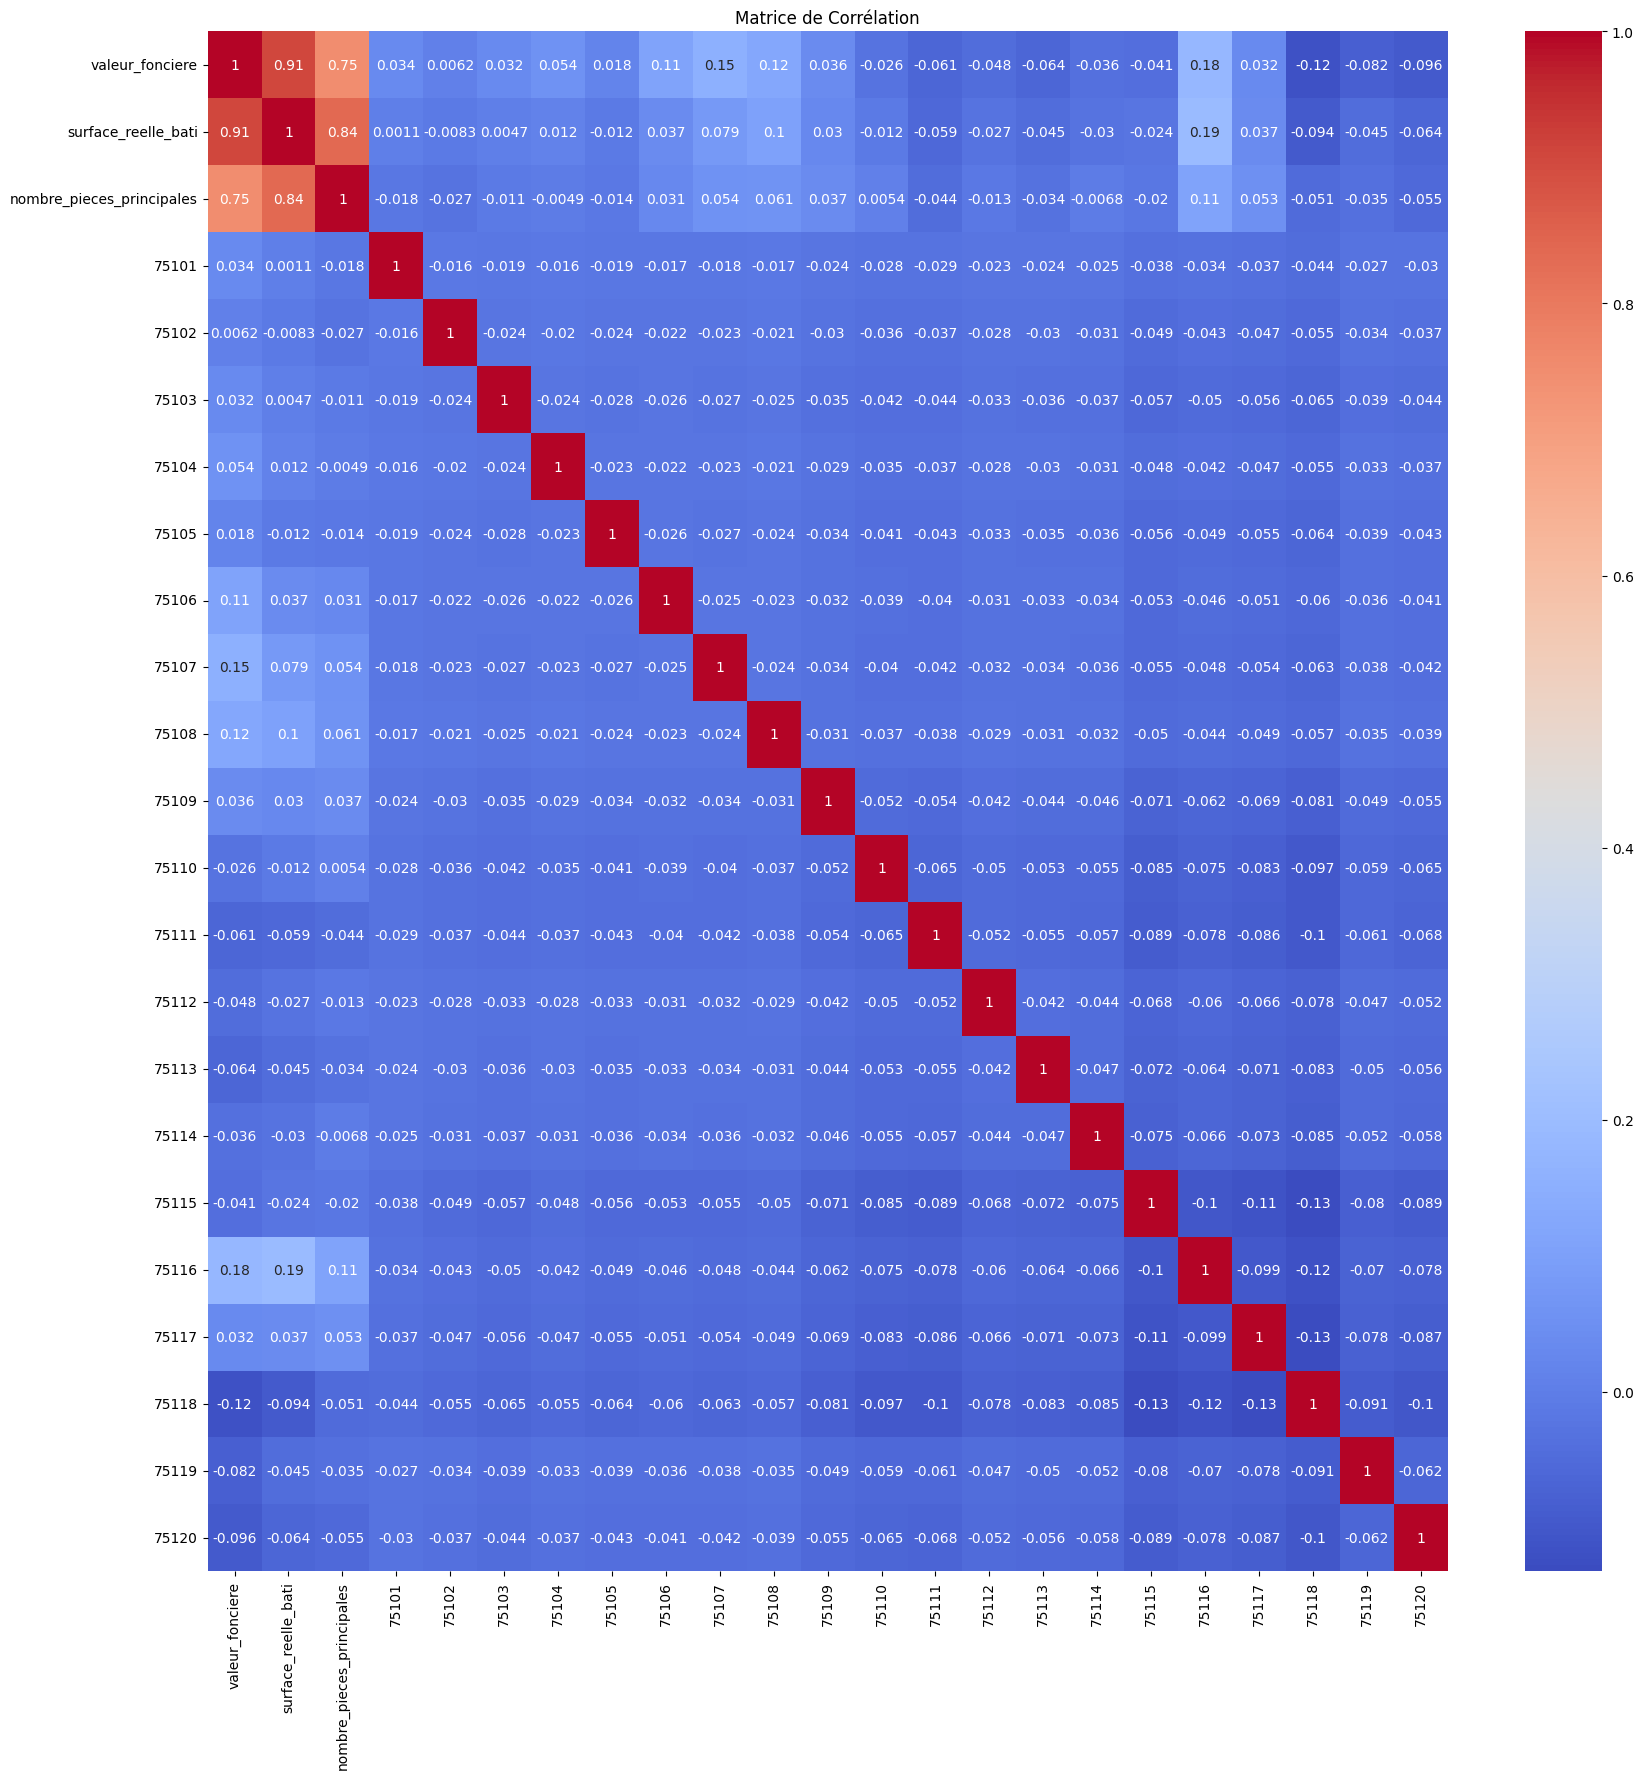

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_final.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, cmap = "coolwarm", annot = True)
plt.title("Matrice de Corrélation")

plt.show()

+ Les 2 variables les plus fortement corrélées à la variable cible "valeur_fonciere" sont "surface_reelle_bati" avec une forte corrélation positive (0.91), et "nombre_pieces_principales" avec un score de corrélation de 0.75
+ Les autres variables ont des scores de corrélation proches de 0 ce qui indique qu'il n'y a pas de corrélation entre elles et la variable cible, nous pouvons donc les exclure des variables utiles pour l'analyse

In [ ]:
X = df_flats[["surface_reelle_bati", "nombre_pieces_principales"]]
y = df_flats["valeur_fonciere"]

> Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
from sklearn.model_selection import train_test_split

# le random state = 0 permet à chaque fois que le train_test_split est effectué de conserver le même échantillonage
# je choisis de configurer le test_size à 0.2 c'est à dire 20% du dataframe (le train_size sera donc à 80%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

> Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score                  # en même temps qu'on importe le modèle de régression linéaire on importe sa métrique spécifique

> Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
model = LinearRegression()                          # on initie le modèle avec ses paramètres par défaut

lin_reg = model.fit(X_train, y_train)                # on entraine sur les données de l'échantillon train, les données de l'échantillon test ne doivent pas être entrainées car elles doivent restées inconnues pour le modèle

In [ ]:
# on effectue les prédictions pour les échantillons train et test

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [ ]:
# on affiche les résultats du r2_score

print("Score train :", r2_score(y_train, y_pred_train))
print("Score test :", r2_score(y_test, y_pred_test))

Score train : 0.824615563925241
Score test : 0.828098854618151


**Réponse:**

Les scores de train et de test sont tous les deux aux alentours de 0.82 (différence de 0.004) ce qui signifie que le modèle explique bien 84% de la variance (l'écart avec la moyenne)

On constate d'ailleurs un score légérement meilleur pour l'ensemble de test ce qui indique une bonne fiabilité du modèle

> Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**

La régression linéaire essaye de tracer une droite de la forme y = ax + b qui passe par tous les points, où y est la variable cible.

L'objectif de la régression linéaire est de déterminer si la variable cible est dépendante des autres variables (si l'une augmente, l'autre aussi et inversement)

### Machine Learning - Classification



In [ ]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


In [ ]:
df_ml_idf.shape

(112583, 4)

In [ ]:
# dans l'optique du modèle de classification on vérifie l'équilibre des classes

df_ml_idf["type_local"].value_counts(normalize = True)

,proportion
type_local,
maison,0.545207
appartement,0.454793


In [ ]:
# avec un rapport d'environ 55/45 on peut dire que les classes sont relativement équilibrées

In [ ]:
# avec describe() on vérifie s'il y a des variations dans l'échelle des données et s'il existe des outliers qui risquent de biaiser la prédiction
import numpy as np

df_ml_idf.describe(percentiles = np.arange(0, 1, 0.1))

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales
count,1.125830e+05,112583.000000,112583.000000
mean,3.158853e+05,74.176385,3.488742
std,2.265718e+05,38.647765,1.563935
min,1.500000e+04,4.000000,0.000000
0%,1.500000e+04,4.000000,0.000000
10%,1.280000e+05,30.000000,1.000000
20%,1.650000e+05,40.000000,2.000000
30%,2.040000e+05,51.000000,3.000000
40%,2.370000e+05,60.000000,3.000000
50%,2.676300e+05,69.000000,3.000000


> Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [ ]:
# la variable cible ne contient que deux valeurs
# pour les besoins du modèle on encode notre variable cible
# je choisis de le faire avec un replace pour garder une visibilité sur les classes

df_ml_idf["type_local"] = df_ml_idf["type_local"].replace({"appartement": 0, "maison" : 1})

<ipython-input-30-de74734e548a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ml_idf["type_local"] = df_ml_idf["type_local"].replace({"appartement": 0, "maison" : 1})


In [ ]:
X = df_ml_idf[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales"]]
y = df_ml_idf["type_local"]

> Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

> Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

model = KNeighborsClassifier()                      # je choisis d'initier le modèle KNeighborsClassifier avec ses hyperparamètres par défaut

In [ ]:
# nous avons de grandes variations dans les échelles de données
# or les modèles de classification sont sensibles aux différences d'échelle notamment KNN qui calcule des distances
# nous devons donc normaliser les données (les mettre à la même échelle)


scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

> Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
modelKNN = model.fit(X_train_s, y_train)

y_pred_train = modelKNN.predict(X_train_s)
y_pred_test = modelKNN.predict(X_test_s)

print("score train :", accuracy_score(y_train, y_pred_train))
print("score test :", accuracy_score(y_test, y_pred_test))

score train : 0.8645326760375724
score test : 0.820357951769774


**Réponse :**

+ Le modèle obtient de bons scores pour le train et le test. Il y a un léger overfitting (différence de 0.04 entre le train et le test)
+ Le score utilisé est l'accuracy_score qui va calculer la proportion de bonnes prédictions par rapport au nombre total de prédictions

> On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

**Réponse :**

+ une des limites du train_test_split est la taille de l'échantillon de test. S'il est trop petit, il y a un risque de mal évaluer le modèle
+ la répartition des jeux de données se fait de façon aléatoire, il y a donc toujours un risque de sur-représentation d'une classe
+ et si les classes (ici "appartement" et "maison") sont trop déséquilibrées, le modèle risque de surapprendre sur la classe majoritaire (et donc de ne prédire que pour la classe majoritaire)

> Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

**Réponse :**


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(model.classes_)

[0 1]


In [ ]:
# pour rappel, "appartement" : 0 et "maison" : 1

conf = confusion_matrix(y_test, y_pred_test)
df_conf = pd.DataFrame(conf, index = ["reel 0", "reel 1"], columns = ["pred 0", "pred 1"])

In [ ]:
print(df_conf)

        pred 0  pred 1
reel 0    8201    2026
reel 1    2019   10271


+ La matrice de confusion nous indique que le modèle prédit correctement la classe "appartement" pour 8201 cas, et prédit correctement la classe "maison" pour 10271 cas
+ en revanche il prédit la classe "appartement" pour 2019 cas alors que la classe réelle est "maison" et inversement dans 2026 cas

In [ ]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_test, y_pred_test)
print("recall_score :", recall)
precision = precision_score(y_test, y_pred_test)
print("precision_score", precision)


recall_score : 0.835720097640358
precision_score 0.8352443685451736


+ Le score Recall (TP / (TP + FN)) représente le ratio de bonnes prédictions par rapport à tous les cas réellement positifs
+ Le score Precision (TP / (TP + FP)) représente le ration de bonnes prédictions par rapport à toutes les prédictions positives

Ici notre modèle prédit correctement 83% des cas réellement positifs (score recall) et le score de précision nous indique que parmi toutes les prédictions positives, 83% sont effectivement positives

Ces scores nous indiquent que le modèle fonctionne bien mais est perfectible